In [1]:
import tqdm
import pandas as pd
from collections import Counter
from itertools import cycle
import graphviz
from sklearn import datasets, metrics, tree
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder

def draw_tree(name, data, features, class_names):
  dot_data = tree.export_graphviz(data, out_file=None) 
  graph = graphviz.Source(dot_data) 
  graph.render(name)
  dot_data = tree.export_graphviz(data, out_file=None, 
                      feature_names=features,  
                      class_names=class_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
  graph = graphviz.Source(dot_data)  
  return graph

In [2]:
cloumns_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "target"]
cars_df = pd.read_csv('/home/dramak/Pobrane/car.data', names=cloumns_names)
cars_df_target = cars_df["target"]
for i in cars_df.columns:
  cars_df[i] = pd.Categorical(cars_df[i]).codes
X_cars_train, X_cars_test = train_test_split(cars_df, test_size=0.3333)
Y_cars_train, Y_cars_test = X_cars_train['target'], X_cars_test['target']
X_cars_test = X_cars_test.drop('target', axis = 1)
X_cars_train = X_cars_train.drop('target', axis = 1)
print(cars_df_target)
print(cars_df["target"])
cars_df.head()

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: target, Length: 1728, dtype: object
0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: target, Length: 1728, dtype: int8


,buying,maint,doors,persons,lug_boot,safety,target
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [3]:
cars_tree_gini = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=7, max_depth=10)
cars_tree_entropy = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=7, max_depth=10)

In [4]:
cars_tree_gini.fit(X_cars_train, Y_cars_train)
cars_tree_entropy.fit(X_cars_train, Y_cars_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

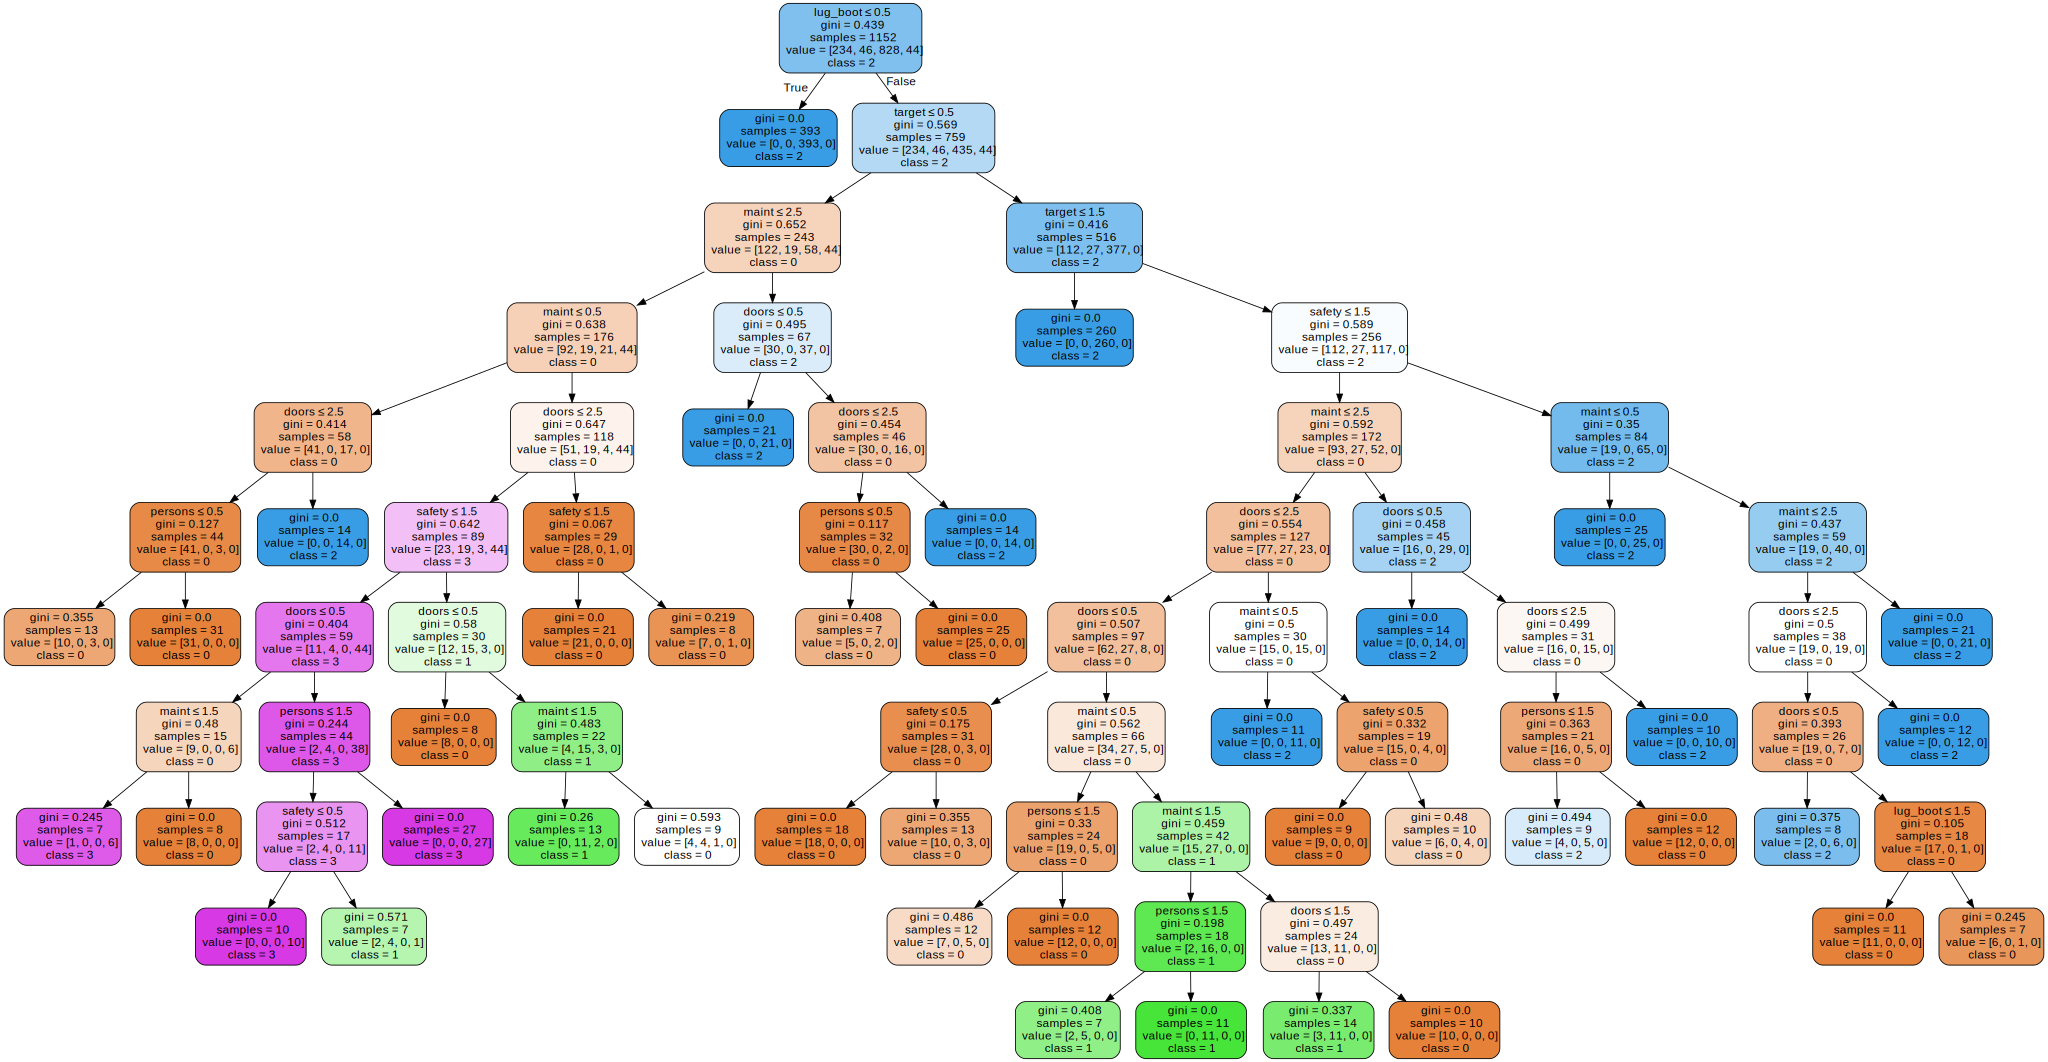

In [5]:
draw_tree("Cars gini", cars_tree_gini, cars_df.columns[1:], ['0', '1', '2', '3'])

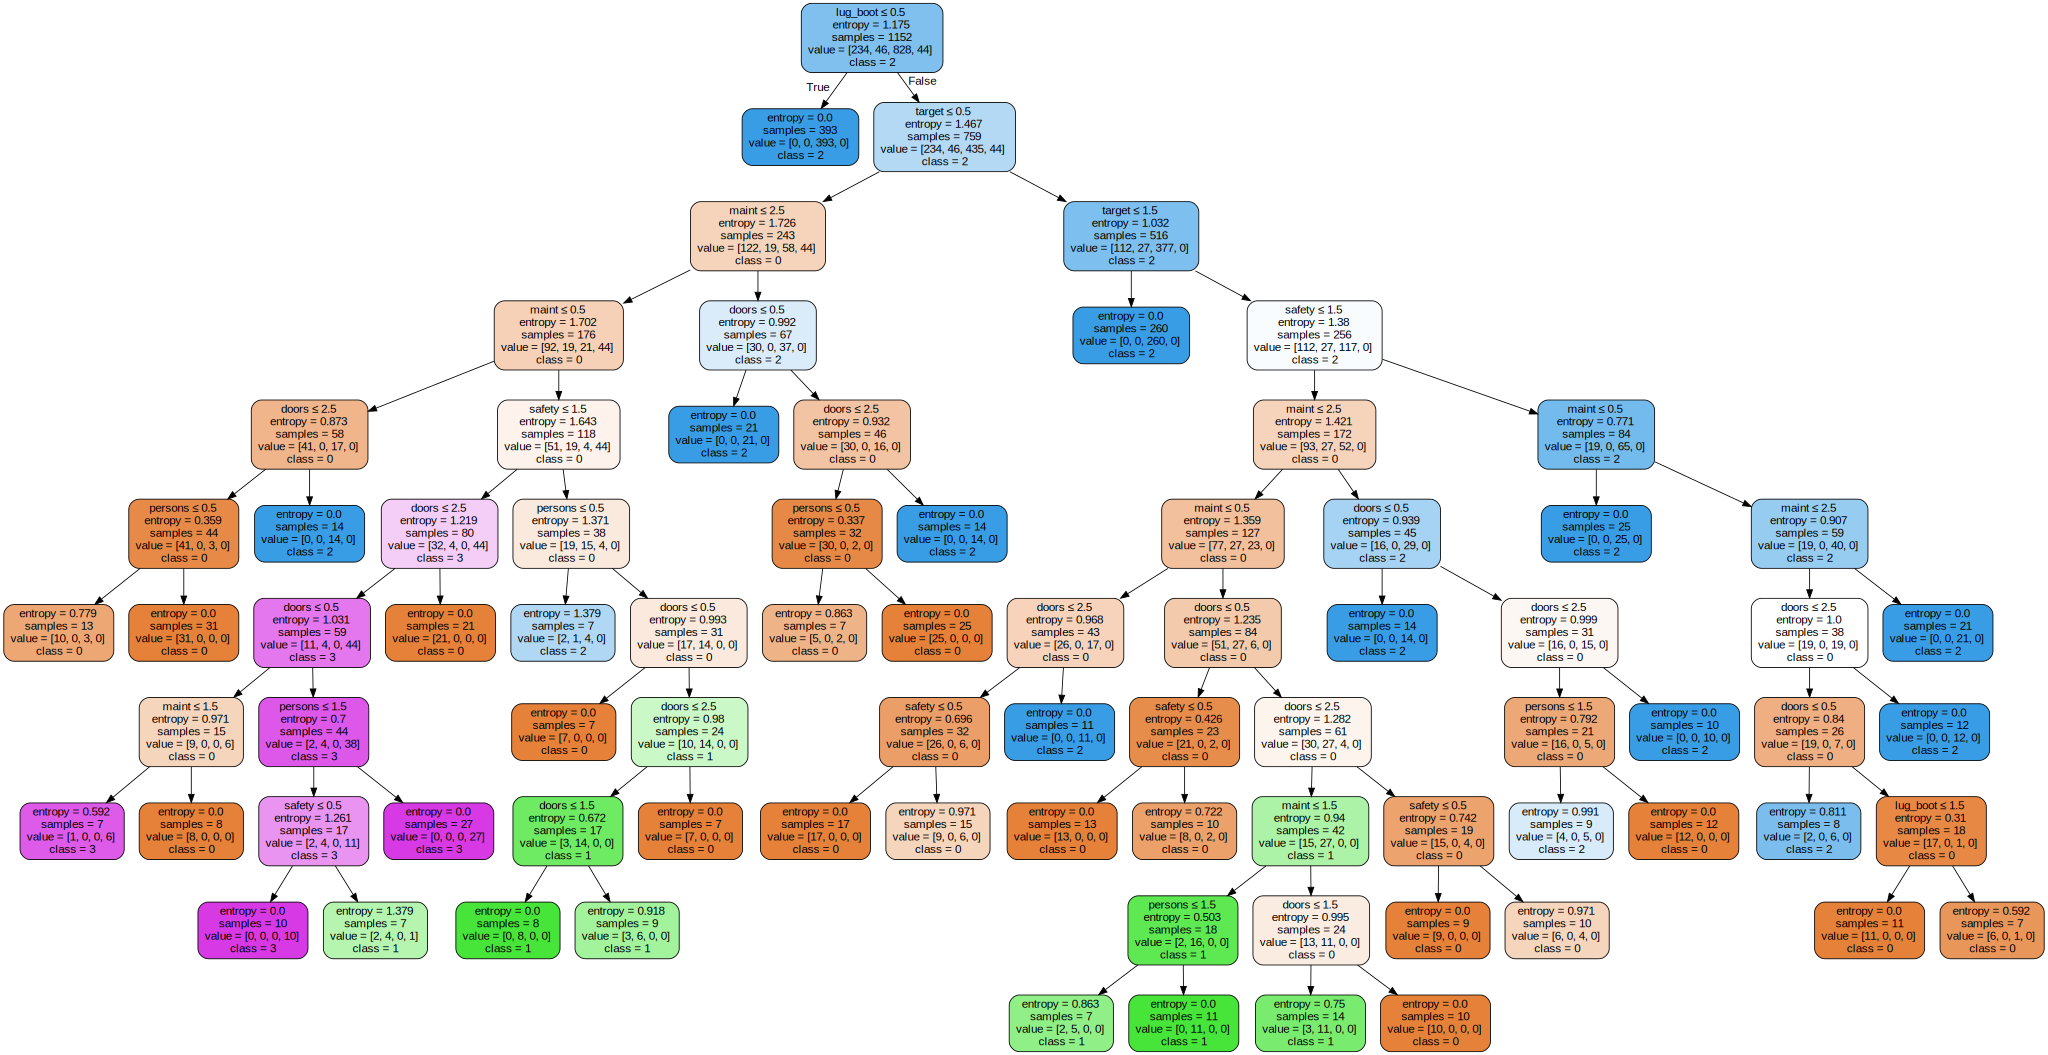

In [6]:
draw_tree("Cars entropy", cars_tree_entropy, cars_df.columns[1:], ['0', '1', '2', '3'])

In [7]:
predicts_gini = cars_tree_gini.predict(X_cars_test)
predicts_entropy = cars_tree_entropy.predict(X_cars_test)

print('Confusion matrix for gini')
print(metrics.confusion_matrix(predicts_gini, Y_cars_test))

print('Confusion matrix for entropy')
print(metrics.confusion_matrix(predicts_entropy, Y_cars_test))

Confusion matrix for gini
[[132   3  13   0]
 [  5  20   0   3]
 [ 11   0 369   0]
 [  2   0   0  18]]
Confusion matrix for entropy
[[126   0   9   0]
 [  8  21   0   3]
 [ 14   2 373   0]
 [  2   0   0  18]]


In [8]:
print(metrics.f1_score(predicts_gini, np.array(Y_cars_test), average=None))
print(cars_tree_gini.score(X_cars_test, Y_cars_test))

[0.88590604 0.78431373 0.96850394 0.87804878]
0.9357638888888888


In [9]:
print(metrics.f1_score(predicts_entropy, np.array(Y_cars_test), average=None))
print(cars_tree_entropy.score(X_cars_test, Y_cars_test))

[0.88421053 0.76363636 0.96757458 0.87804878]
0.9340277777777778
